In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import gc

# **Enter the number of rows you want to visualize**

In [2]:
num = input("Enter number of rows:")

# **Read Processed_Dataset**

To download csv file

https://drive.google.com/file/d/1-XvUBfFhfRHTEf3Au2EDjdJ9OPGADJ79/view?usp=share_link

In [3]:
num = int(num)
dataset = pd.read_csv('https://media.githubusercontent.com/media/M-Umr1/datasets/master/Processed_BigDataset_for_Visualization.csv', nrows=num)

In [12]:
dataset

,time_stamp,Function,Time
0,2022-07-03 15:50:12.096,get_newest_articles_api.py get_keywords,4.328657
1,2022-07-03 15:50:12.295,get_newest_articles_api.py save_to_db,0.178776
2,2022-07-03 15:50:12.302,get_newest_articles_api.py db_check_not_empty,0.003546
3,2022-07-03 15:50:12.309,get_newest_articles_api.py db_get_newest_entry,0.003825
4,2022-07-03 15:50:12.332,get_newest_articles_api.py get,0.019008
...,...,...,...
999995,2022-07-12 22:40:33.696,main.py (API) main,0.148510
999996,2022-07-12 22:40:33.704,main.py (API) save_to_db,0.002080
999997,2022-07-12 22:40:36.361,main.py (API) main,0.060661
999998,2022-07-12 22:40:36.369,main.py (API) save_to_db,0.002013


In [4]:
dataset['time_stamp'] = pd.to_datetime(dataset['time_stamp'])

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 3 columns):
time_stamp    1000000 non-null datetime64[ns]
Function      1000000 non-null object
Time          1000000 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 19.1+ MB


In [15]:
dataset['Time'].max()

447.84924364089966

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 3 columns):
time_stamp    1000000 non-null datetime64[ns]
Function      1000000 non-null object
Time          1000000 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 19.1+ MB


In [5]:
dataset.set_index('time_stamp',inplace=True)

In [28]:
dataset

,Function,Time
time_stamp,,
2022-07-03 15:50:12.096,get_newest_articles_api.py get_keywords,4.328657
2022-07-03 15:50:12.295,get_newest_articles_api.py save_to_db,0.178776
2022-07-03 15:50:12.302,get_newest_articles_api.py db_check_not_empty,0.003546
2022-07-03 15:50:12.309,get_newest_articles_api.py db_get_newest_entry,0.003825
2022-07-03 15:50:12.332,get_newest_articles_api.py get,0.019008
...,...,...
2022-07-12 22:40:33.696,main.py (API) main,0.148510
2022-07-12 22:40:33.704,main.py (API) save_to_db,0.002080
2022-07-12 22:40:36.361,main.py (API) main,0.060661


Get unique function from dataset

In [6]:
dataset.Function.nunique() #Number of unique
unique_function = dataset.Function.unique() #unique values in an array

# **Visualization**

My code to visualize any number of rows, i have made a formula due to which the image size will be change according to number of rows int he dataset

In [7]:
# it takes around 40 seconds to visualiz 5.2 million records
%timeit
length_functions = len(unique_function)
figure_col_size = 10*(length_functions//2)
if length_functions%2 == 0:
  plt.figure(figsize=(22, figure_col_size+80))
elif length_functions%2 != 0:
  plt.figure(figsize=(22, figure_col_size+90))

ncols = 3
# calculate number of rows
nrows = length_functions - 1

for n, each_function in enumerate(unique_function):
  
  # add a new subplot iteratively
  ax = plt.subplot(nrows, ncols, n+1)
  # filter df and plot ticker on the new subplot axis
  dataset[dataset["Function"] == each_function].plot(ax=ax)
    # chart formatting
  ax.set_title(each_function, fontsize=15)
  ax.set_xlabel('time_stamp', fontsize=10)
  ax.set_ylabel('Time', fontsize=10)

#plt.tight_layout()
plt.xticks(rotation=45)
# plt.savefig('./visualization_app/templates/image/image.svg', bbox_inches = 'tight', pad_inches = 0)

plt.show()
plt.clf()    # normally I use these lines to release the memory
plt.close()
# plt.show()


In [8]:
dataset.reset_index('time_stamp',inplace=True)

This is the optimize code using Chat GPT help, I copy my above code and ask ChatGPT to optimize my code and it converted my code with completely new look. The gpt code had a few mistakes but now all are resolved and this code is also giving the same result as above.
This code is much simpler as well

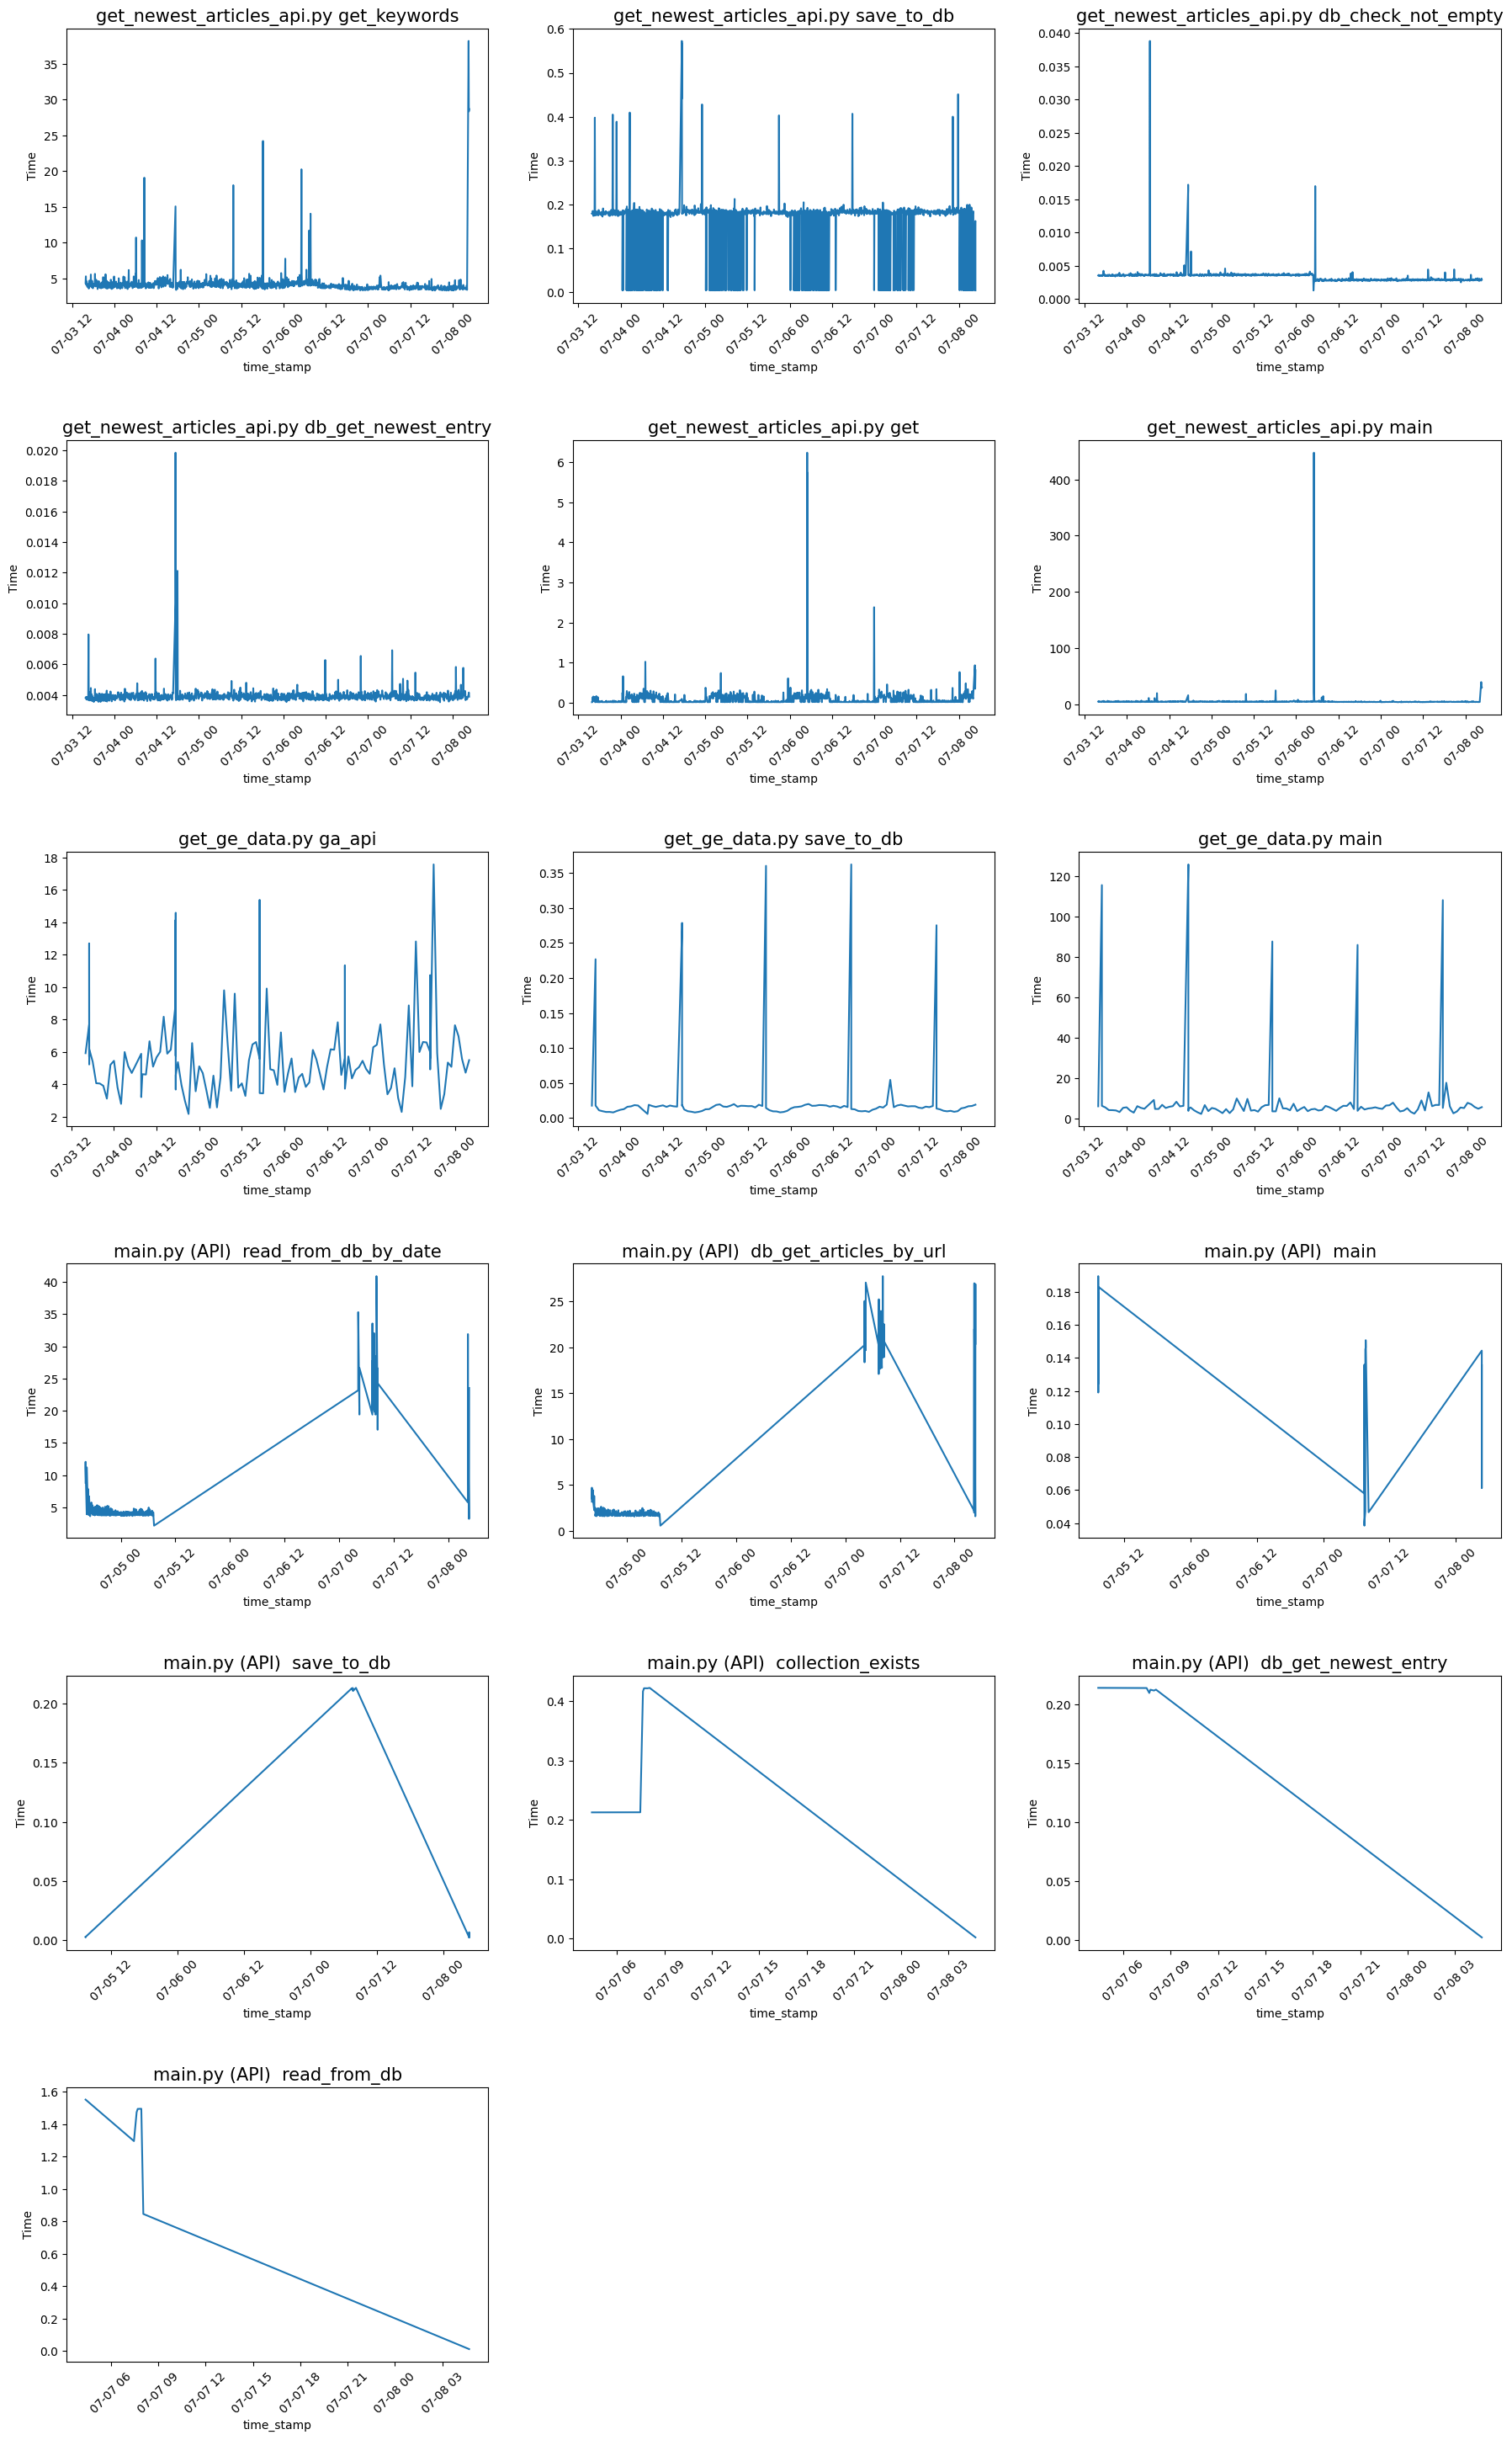

In [9]:
# Define the number of rows and columns for the subplots
num_plots = len(unique_function)
cols = 3
rows = math.ceil(num_plots / cols)

# Calculate the figure size based on the number of rows and columns
fig_width = 22
fig_height = rows * 6
fig_size = (fig_width, fig_height)

# Create the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=fig_size)

# Iterate over the unique functions and plot on the corresponding subplot
for i, func in enumerate(unique_function):
    subset = dataset[dataset["Function"] == func]
    row = i // cols
    col = i % cols
    axes[row, col].plot(subset["time_stamp"], subset["Time"])
    axes[row, col].set_title(func, fontsize=15)
    axes[row, col].set_xlabel('time_stamp', fontsize=10)
    axes[row, col].set_ylabel('Time', fontsize=10)

# Hide any extra subplots that aren't being used
for i in range(num_plots, cols * rows):
    row = i // cols
    col = i % cols
    axes[row, col].set_visible(False)

# Adjust the spacing and layout of the subplots
# plt.tight_layout()

# Adjust the spacing between the subplots
fig.subplots_adjust(hspace=0.5)

# Rotate the xticks by 45 degrees
for ax in axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.savefig('./visualization_app/templates/image/image.svg', bbox_inches = 'tight', pad_inches = 0)
plt.show()

# Close the plot and release memory
plt.close()